 About the Dataset 
The stock market has always intrigued me. Numbers, Charts, High-pressure environments, thinking on your feet, Wall Street, Hedge funds all of it!.The dataset has around 60 features which includes features extracted from OHLC, other index prices such as QQQ(Nasdaq-100 ETF) & S&P 500, technical Indicators such as Bollinger bands, EMA(Exponential Moving Averages, Stocastic %K oscillator, RSI etc). The stock market depends upon many many factors such as previous days performance, Global financial news, Public sentiment about the company, Mergers & Acquisitions, Moving Averages, etc.I will use the Google Stock Data for this Project from kaggle.


Problem Statement :
  1.I want to analyse the data,clean and prepare for model training.
  2.I want to build model to predict the Stock market movement using deep learning techniques
  3.To be precise, I want to generate realistic buy/sell signals for the next day based on future stock price estimates using   time series modeling.A time series is a sequence of data points collected or recorded over successive and equally spaced intervals of time.
  4.I want to implement this using Tensor flow open source framework and want to dig deeper on Recurrent Neural Network.


Variables:

Date: Represents the date of the relevant Transaction Day.
Open: Represents the initial share price of the relevant Trading Day.
High: Represents the highest price of the relevant Trading Day.
Low: It represents the lowest price of the relevant trading day.
Close: It represents the closing price of the stock on the relevant trading day.
Adj Close: Represents the adjusted closing price of the stock of the relevant trading day.
Volume: It represents the trading volume information of the relevant trading day

# Load the data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

C:\Users\shema\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load the data as a Pandas data frame and ensure that it imported correctly.
df=pd.read_csv("TSLA.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


<AxesSubplot:title={'center':'Tesla stock price'}, xlabel='Date', ylabel='USD'>

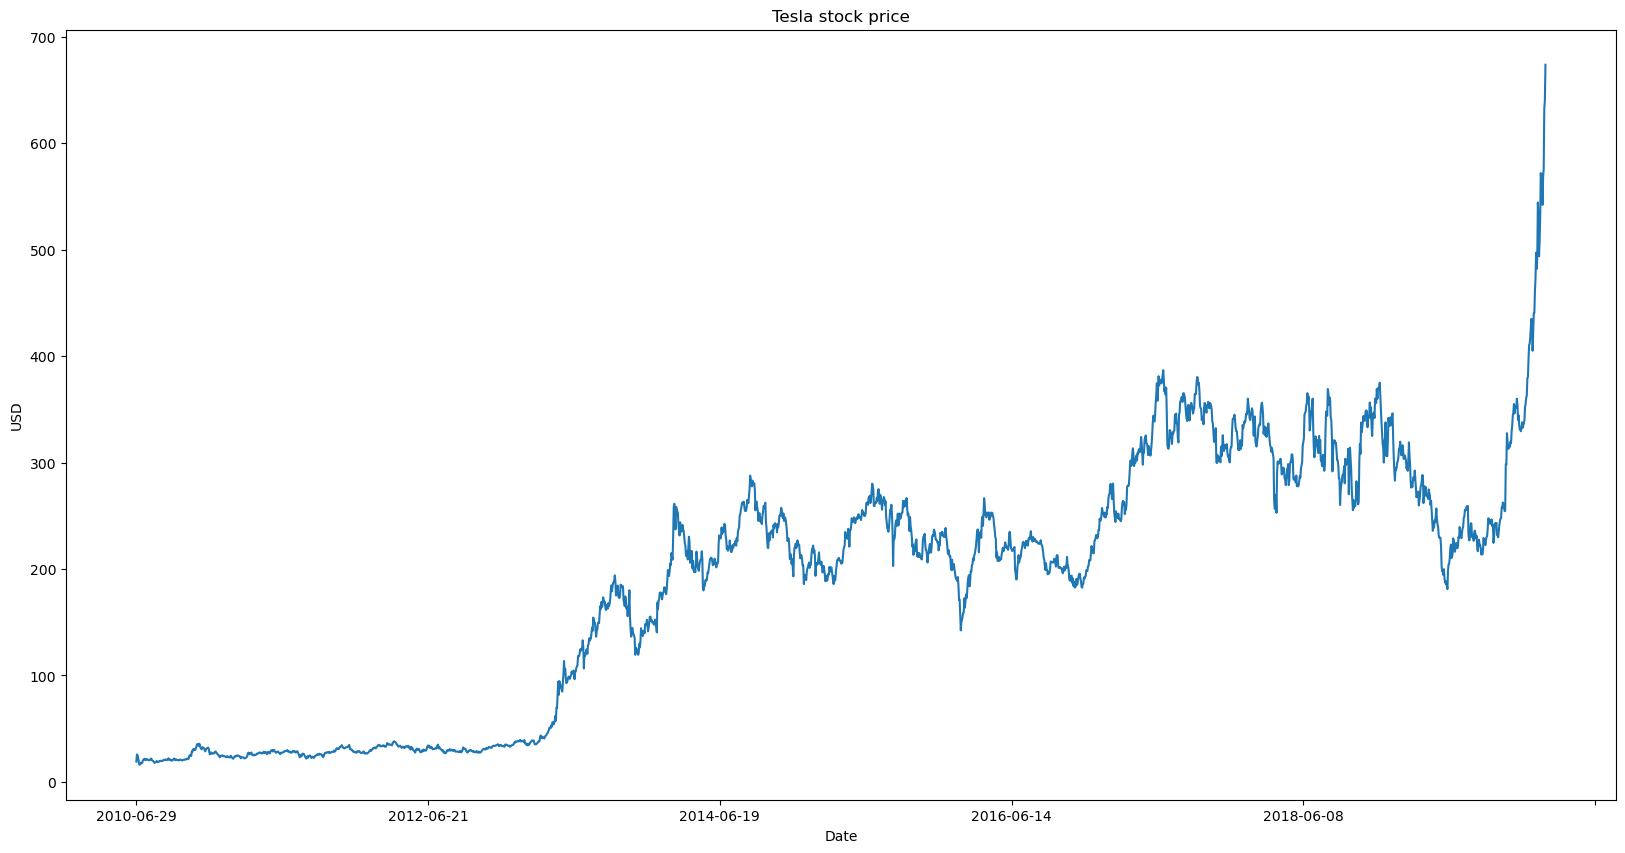

In [3]:
df.plot(x="Date", y="Open", title="Tesla stock price", ylabel="USD", legend=False, figsize=(20, 10))

Google stock since 2005 has been on a drastic rise; continuing to reach it's peak year after year.

<AxesSubplot:title={'center':'Tesla stock price'}, xlabel='Date', ylabel='USD'>

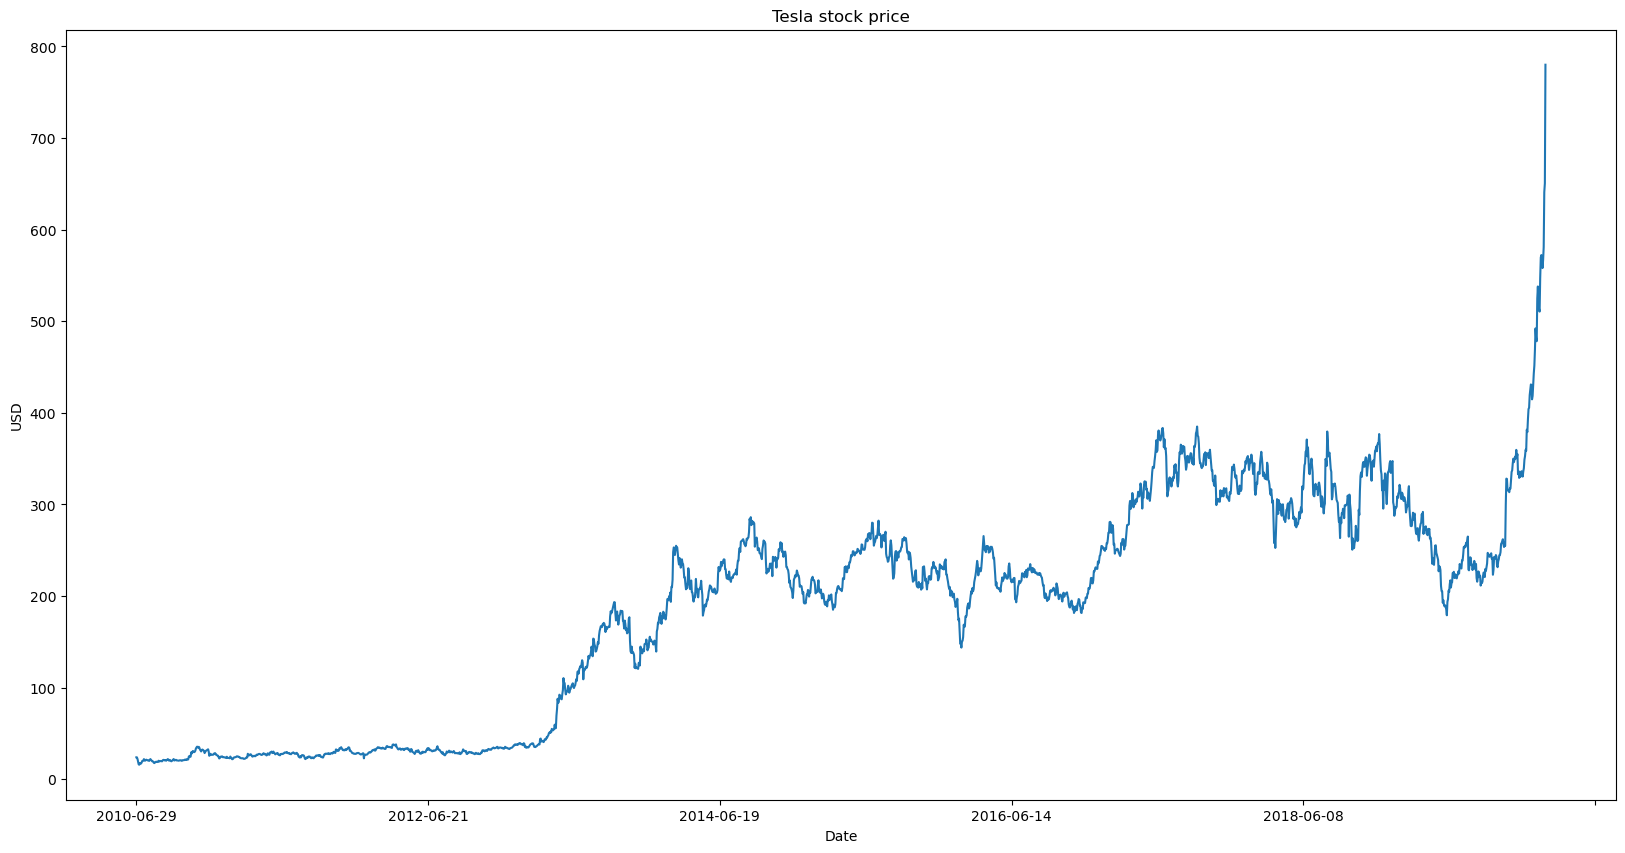

In [4]:

df.plot(x="Date", y="Adj Close", title="Tesla stock price", ylabel="USD", legend=False, figsize=(20, 10))

<AxesSubplot:title={'center':'Tesla stock price'}, xlabel='Date', ylabel='USD'>

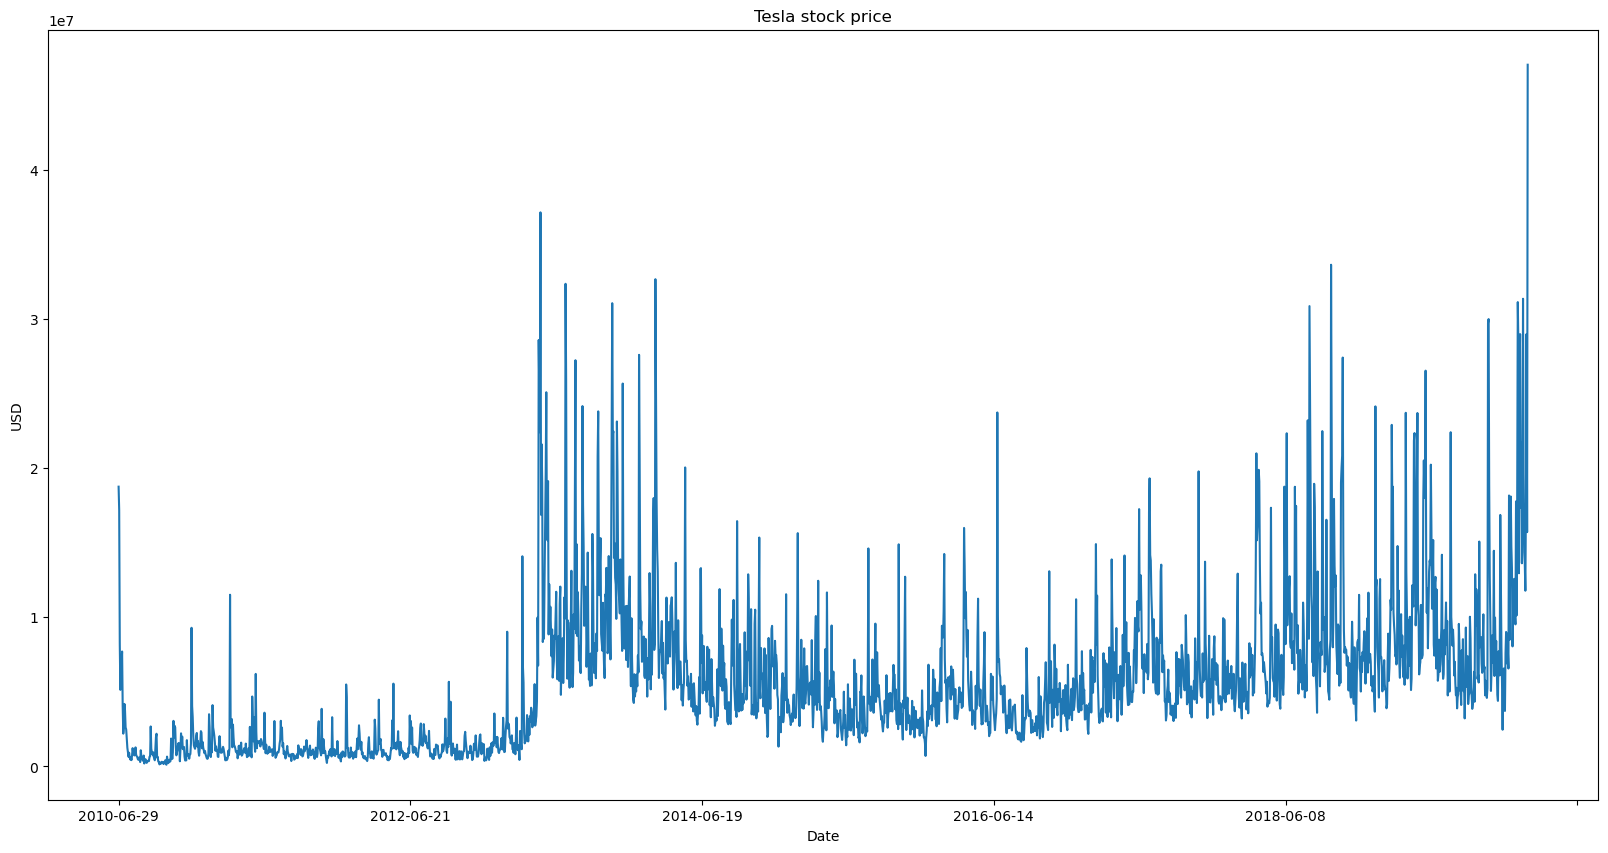

In [5]:
df.plot(x="Date", y="Volume", title="Tesla stock price", ylabel="USD", legend=False, figsize=(20, 10))

<AxesSubplot:>

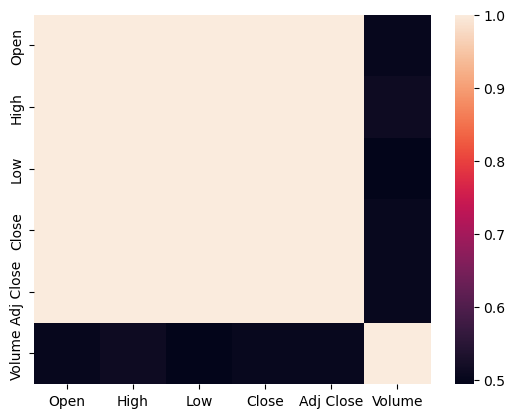

In [6]:

# Create a heatmap of the correlation between variables

corr = df.corr()
sns.heatmap(corr)


Above  visualize the correlation between different variables in a dataset.A correlation coefficient is a number between -1 and 1 that tells you the strength and direction of a relationship between variables.
In other words, it reflects how similar the measurements of two or more variables are across a dataset.
We can decide on the feature selection based on above correlation coefficients.

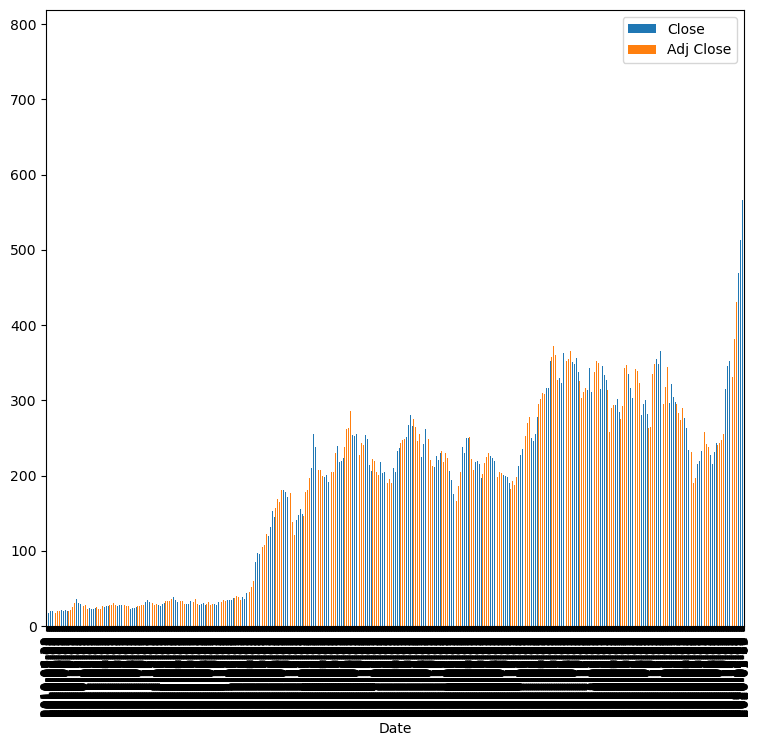

In [7]:
# plot the dataframe
df.plot(x="Date", y=["Close", "Adj Close"], kind="bar", figsize=(9, 8))
plt.show()

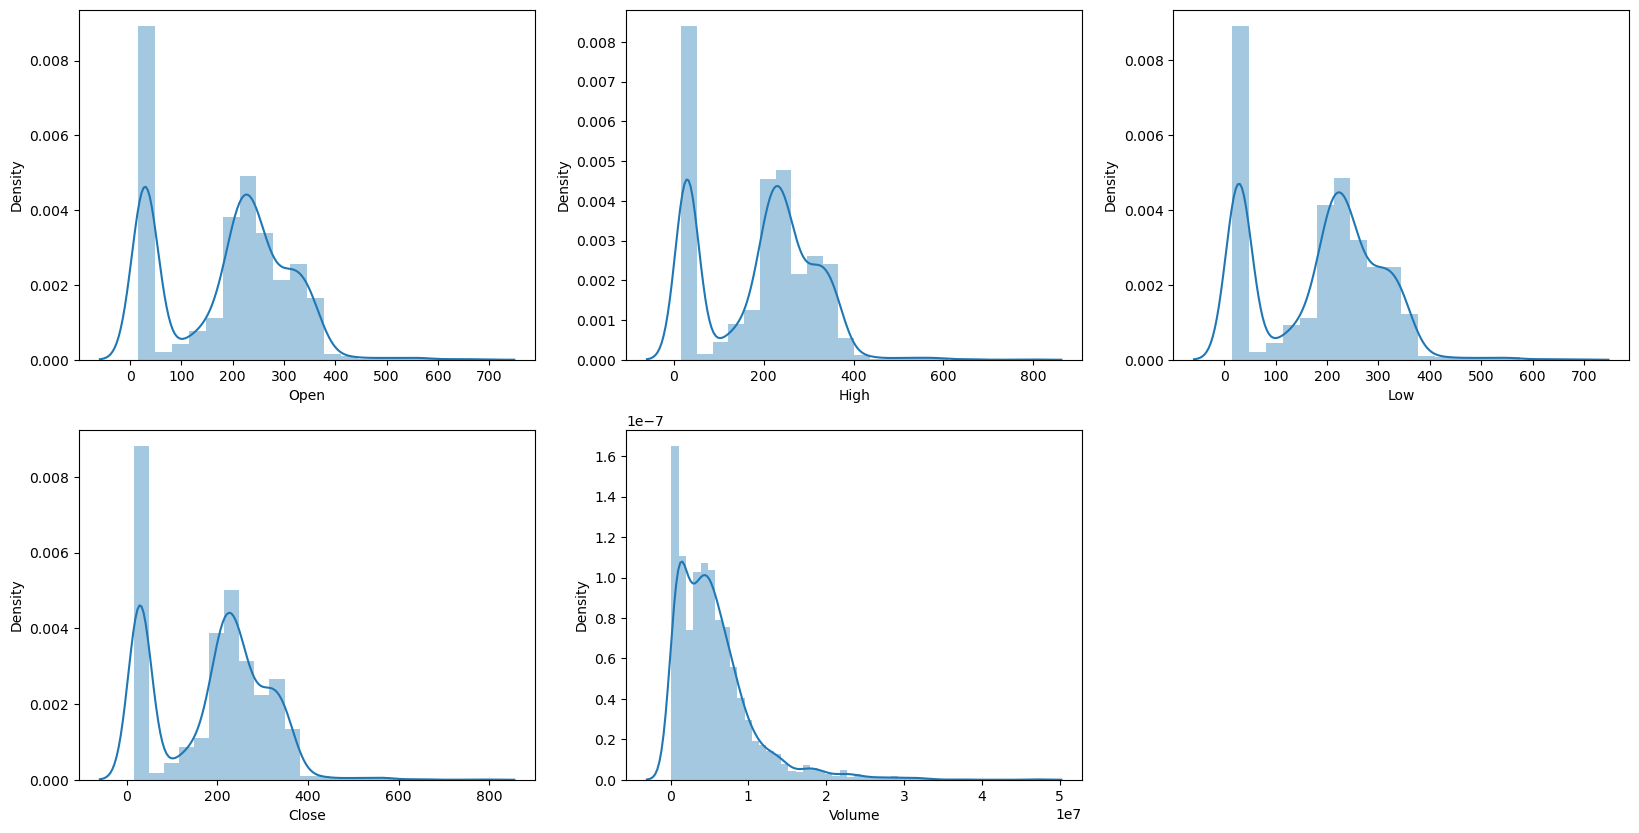

In [8]:
import seaborn as sb

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()


we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

## Project_MileStone_2


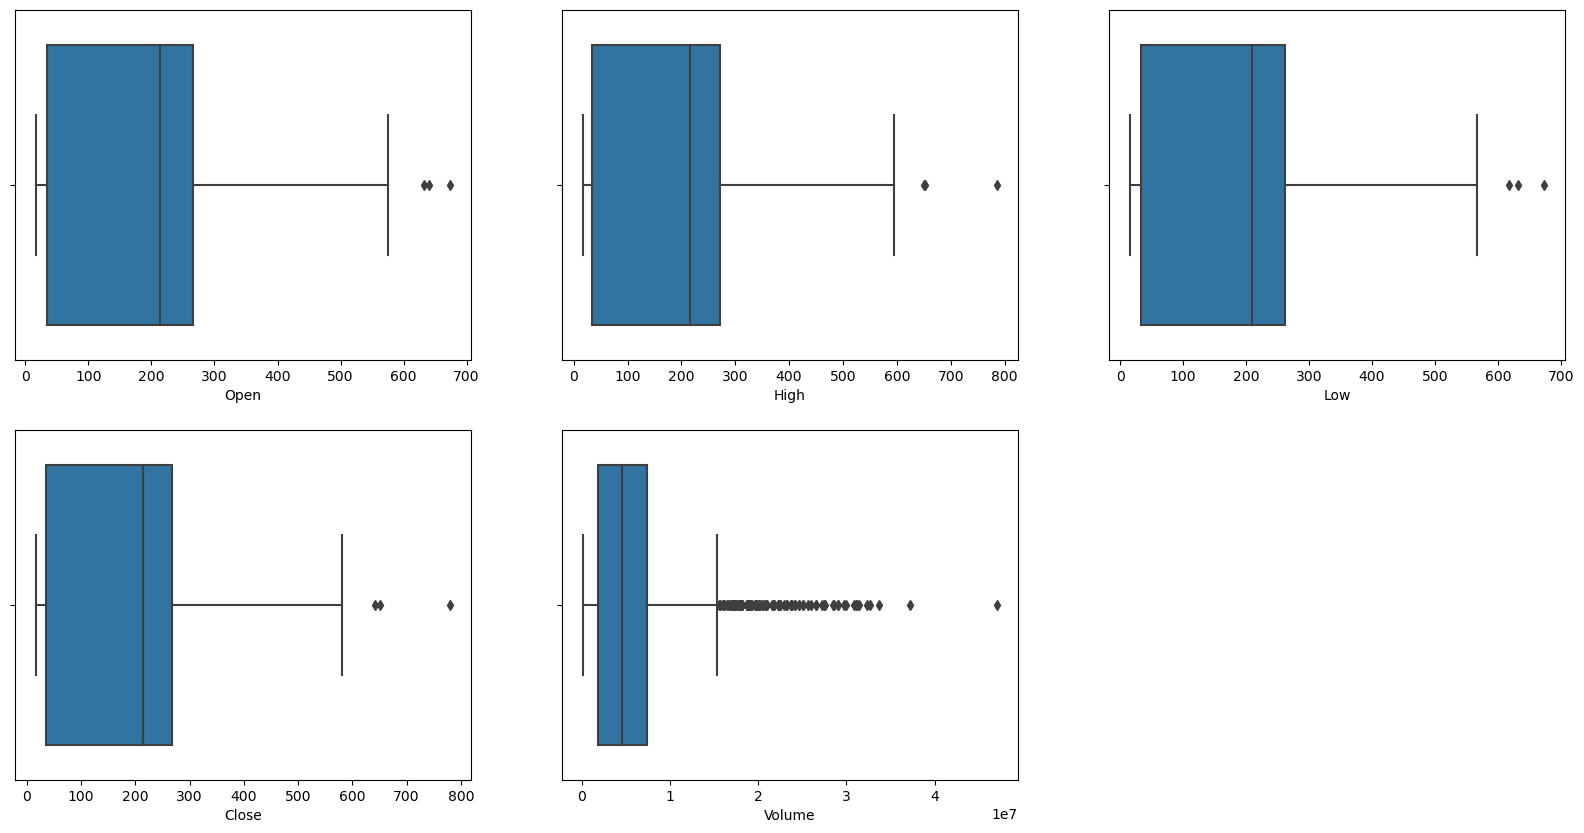

In [9]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()


I can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [10]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6


In [11]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,2010,6,29,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,2010,6,30,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,2010,7,1,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,2010,7,2,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,2010,7,6,0


A quarter is defined as a group of three months. Every company prepares its quarterly results and publishes them publicly so, that people can analyze the company’s performance. These quarterly results affect the stock prices heavily which is why we have added this feature because this can be a helpful feature for the learning model.

In [12]:
data_grouped = df.groupby('year').mean()
data_grouped

,Open,High,Low,Close,Adj Close,Volume,month,day,is_quarter_end
year,,,,,,,,,
2010,23.408000,24.077231,22.646077,23.341846,23.341846,1.579762e+06,9.453846,16.030769,0.346154
2011,26.821984,27.380238,26.194167,26.804762,26.804762,1.290615e+06,6.547619,15.634921,0.345238
2012,31.203120,31.809160,30.545880,31.168600,31.168600,1.229796e+06,6.500000,15.776000,0.328000
2013,104.416428,106.853016,101.779881,104.401230,104.401230,8.407722e+06,6.543651,15.650794,0.321429
2014,223.415397,227.449881,219.206111,223.329088,223.329088,6.913973e+06,6.551587,15.761905,0.337302
2015,229.831944,233.381666,226.270635,230.042898,230.042898,4.318325e+06,6.567460,15.750000,0.345238
2016,210.058452,213.433492,206.286151,209.767262,209.767262,4.612546e+06,6.555556,15.682540,0.341270
2017,314.296215,318.450598,309.686972,314.316295,314.316295,6.334786e+06,6.533865,15.800797,0.338645
2018,317.183466,323.693626,310.552311,317.309921,317.309921,8.612107e+06,6.505976,15.796813,0.318725


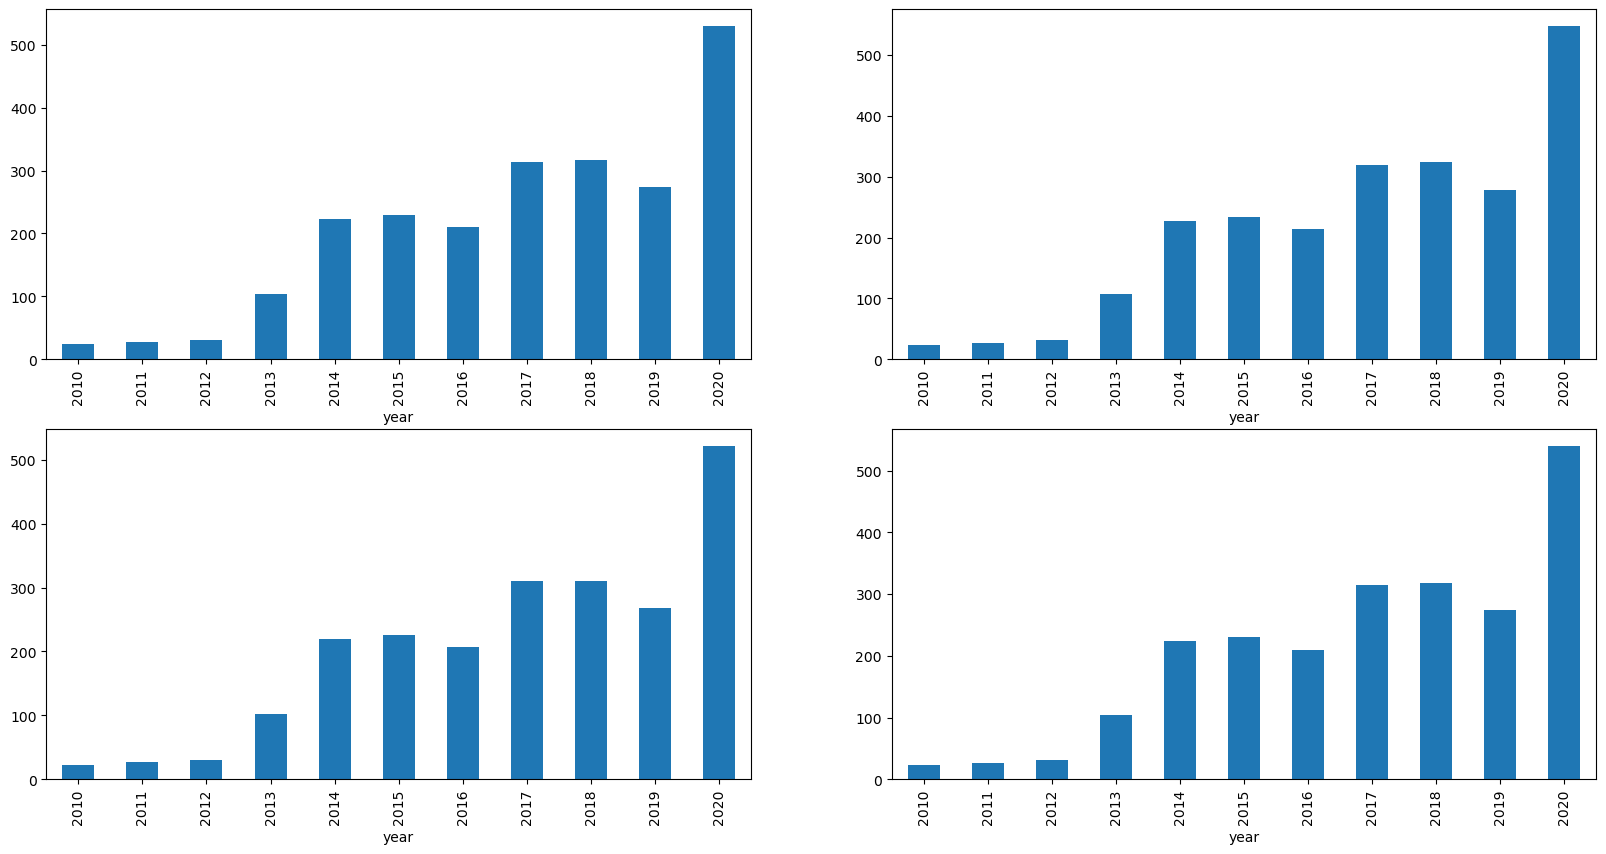

In [13]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()


In [14]:
df.groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,year,month,day
is_quarter_end,,,,,,,,,
0,185.875081,189.254226,182.449499,186.085081,186.085081,5.767062e+06,2014.816213,6.173886,15.710396
1,187.071200,190.232700,183.860262,187.047163,187.047163,5.180154e+06,2014.697500,7.597500,15.825000


Here are some of the important observations of the above-grouped data:

Prices are higher in the months which are quarter end as compared to that of the non-quarter end months.
The volume of trades is lower in the months which are quarter end.

In [15]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)


In [16]:
#Creation of the new column "Price difference"

df['PriceDiff'] = df['Close'].shift(-1) - df['Close']
print(df['PriceDiff'])

0        -0.059999
1        -1.870001
2        -2.759998
3        -3.090000
4        -0.310001
           ...    
2411     14.089966
2412     59.820008
2413      9.760009
2414    129.429993
2415           NaN
Name: PriceDiff, Length: 2416, dtype: float64


In [17]:
# Creation of the new column "Daily return"

df['Return'] = df['PriceDiff'] /df['Close']
print(df['Return'])


0      -0.002511
1      -0.078473
2      -0.125683
3      -0.160937
4      -0.019243
          ...   
2411    0.024854
2412    0.102962
2413    0.015231
2414    0.198949
2415         NaN
Name: Return, Length: 2416, dtype: float64


In [18]:
df.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
year              0
month             0
day               0
is_quarter_end    0
open-close        0
low-high          0
target            0
PriceDiff         1
Return            1
dtype: int64

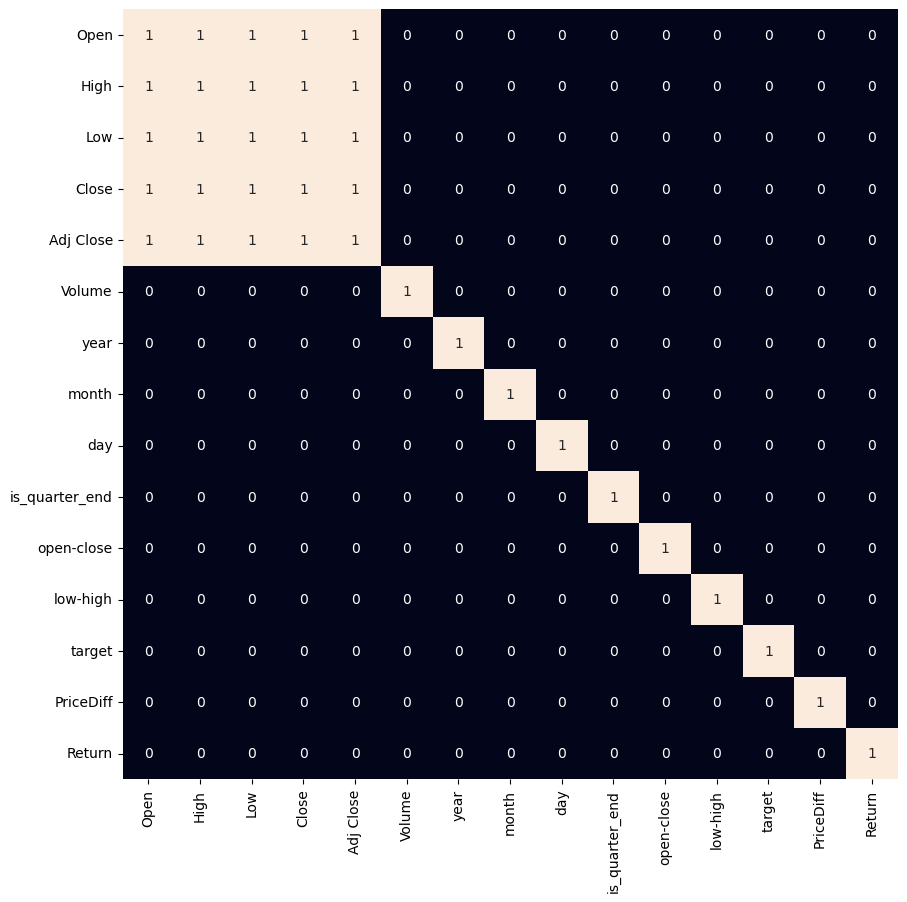

In [19]:
#Checking for factors responsible in overall volume trade
#Performing default correlation using Pearson Method


plt.figure(figsize=(10, 10))
sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

 Its clear from Correlation Matrix there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

### Data Splitting and Normalization

Recursive feature elimination (RFE)
Recursive Feature Elimination (RFE) is known as a wrapper feature selection and employs ML models when computing the relevance scores of the features. RFE firstly trains a model with an entire feature set and computes a relevance score for each feature. In the next step, the feature with the least relevance score is neglected and the model is re-trained to compute new feature relevance scores. This process is continued until the desired number of features remain in the feature set. Therefore, the desired subset size is a parameter that needs to be set before the model initialization.

In [20]:

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [21]:
from sklearn.preprocessing import StandardScaler

features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']




In [22]:
X_train, X_valid, Y_train, Y_valid = train_test_split(
	features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(2174, 3) (242, 3)


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(X_train)

dataset_train_scaled.shape

(2174, 3)

In [24]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [26]:
# importing libraries
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout



In [27]:
# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True, 
              input_shape = (X_train.shape[1],1))
             )

regressor.add(
    Dropout(0.2)
             )

In [28]:
# adding second RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [29]:
# adding third RNN layer and dropout regulatization

regressor.add(
    SimpleRNN(units = 50, 
              activation = "tanh", 
              return_sequences = True)
             )

regressor.add(
    Dropout(0.2)
             )

In [33]:
# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(
    optimizer = "adam", 
    loss = "mean_squared_error",
    metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, Y_train, epochs = 50, batch_size = 32)

Epoch 1/50
68/68 [==============================] - 2s 4ms/step - loss: 0.4856 - accuracy: 0.4876
Epoch 2/50
68/68 [==============================] - 0s 4ms/step - loss: 0.3452 - accuracy: 0.4877
Epoch 3/50
68/68 [==============================] - 0s 5ms/step - loss: 0.3047 - accuracy: 0.5087
Epoch 4/50
68/68 [==============================] - 0s 5ms/step - loss: 0.2945 - accuracy: 0.5003
Epoch 5/50
68/68 [==============================] - 0s 5ms/step - loss: 0.2886 - accuracy: 0.4962
Epoch 6/50
68/68 [==============================] - 0s 6ms/step - loss: 0.2745 - accuracy: 0.5104
Epoch 7/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2768 - accuracy: 0.5037
Epoch 8/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.5063
Epoch 9/50
68/68 [==============================] - 0s 4ms/step - loss: 0.2662 - accuracy: 0.5138
Epoch 10/50
68/68 [==============================] - 0s 5ms/step - loss: 0.2670 - accuracy: 0.5109
Epoch 11/50
68/68 [